In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
n_samples = 1500
dataset1 = sklearn.datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0],columns=["x",'y'])
dataset2 = sklearn.datasets.make_moons(n_samples=n_samples, noise=.05)
dataset2=pd.DataFrame(dataset2[0],columns=["x",'y'])

dataset3 = sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8)
dataset3=pd.DataFrame(dataset3[0],columns=["x",'y'])

dataset4= np.random.rand(n_samples, 2), None
dataset4=pd.DataFrame(dataset4[0],columns=["x",'y'])

dataset5= pd.read_csv("/content/dataset5.csv",names=["x",'y'])
dataset6= pd.read_csv("/content/dataset6.csv",names=["x",'y'])
dataset7= pd.read_csv("/content/dataset7.csv",names=["x",'y'])
dataset8= pd.read_csv("/content/dataset8.csv")
dataset9= pd.read_csv("/content/dataset9.csv")
datasets=[dataset1]
# z = StandardScaler()
# dataset6[["x","y"]] = z.fit_transform(dataset6)
# ggplot(dataset6, aes(x = "x", y = "y")) + geom_point() 


In [3]:
# datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]
dataset9.head()

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459


1) plot all dataset
2) use standard scalar
3) use K-means, agglomerative, dbscan
4) plot dataset after clustering
5) Evaluate inertia,silhouette score,..........

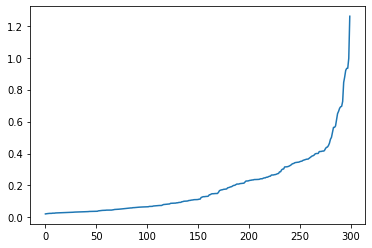

In [4]:
mins = 3
nn = NearestNeighbors(n_neighbors=4)

nn.fit(dataset9[["x", "y"]])

distances, neighbors = nn.kneighbors(dataset9[["x", "y"]])

distances = np.sort(distances[:, mins], axis = 0)
X=list(range(0,len(distances)))
plt.plot(X,distances)


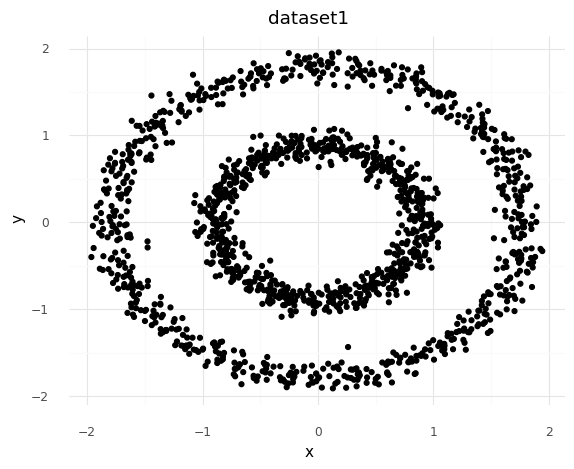

<ggplot: (8734351170937)>


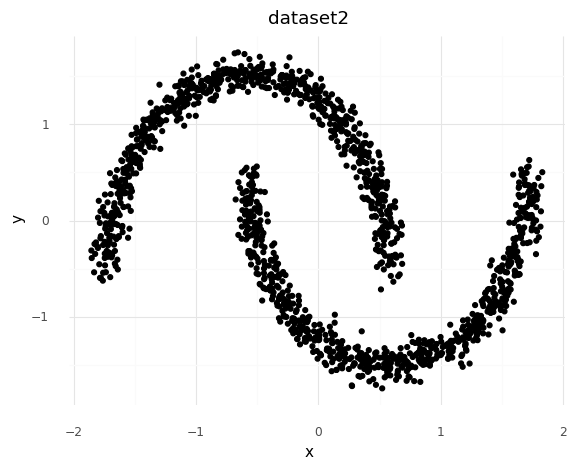

<ggplot: (8734311373341)>


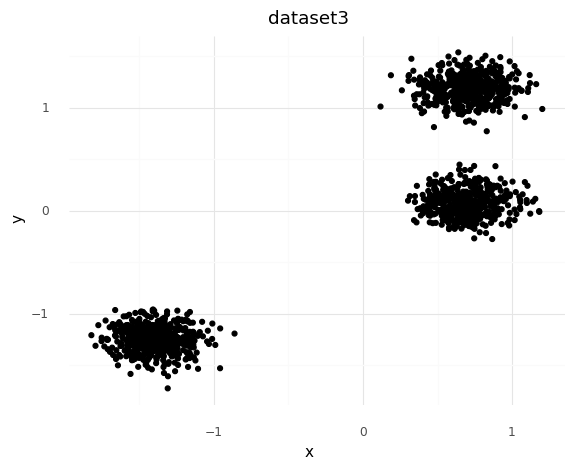

<ggplot: (8734309775421)>


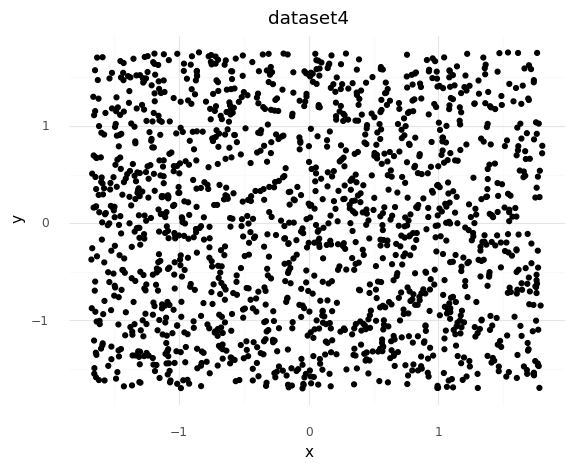

<ggplot: (8734308151493)>


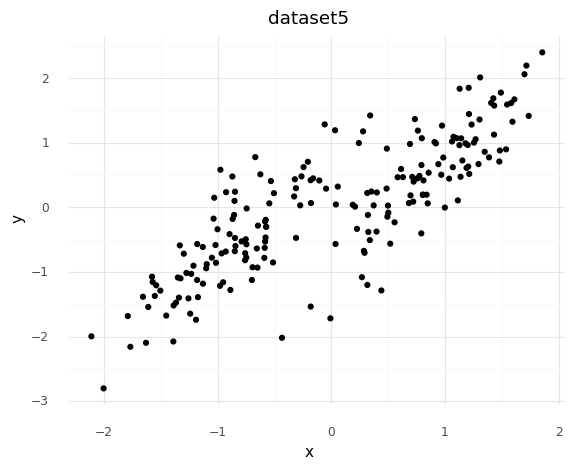

<ggplot: (8734308112489)>


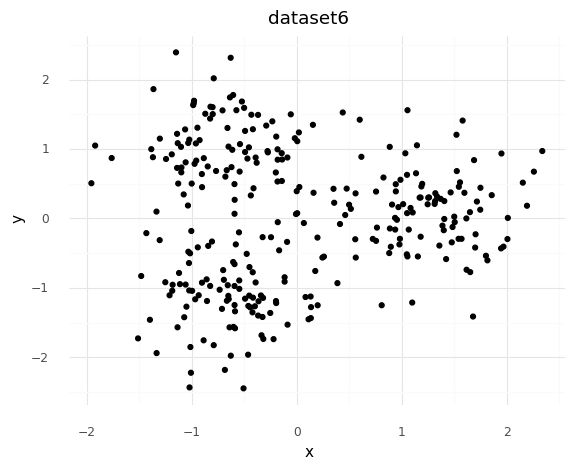

<ggplot: (8734308064617)>


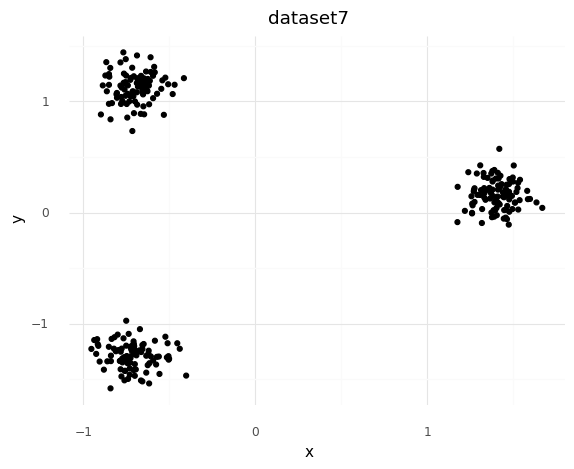

<ggplot: (8734308034577)>


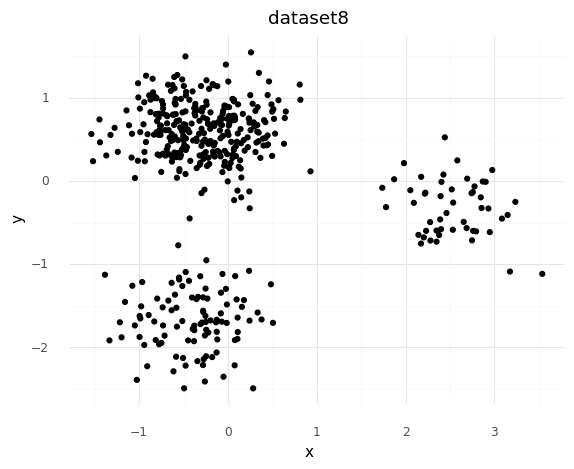

<ggplot: (8734308140881)>


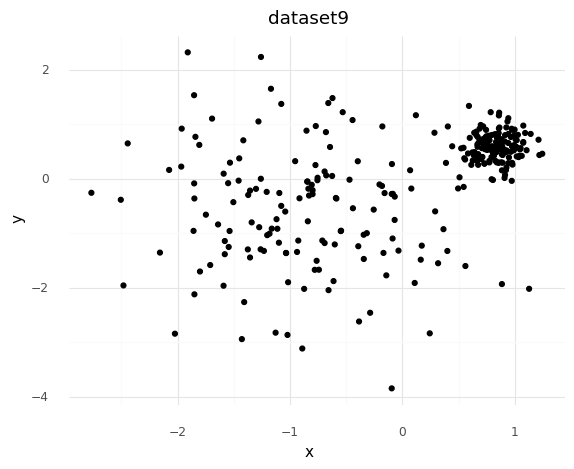

<ggplot: (8734308057185)>


In [3]:
datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]
i=1
for dataset in datasets:
  
  z = StandardScaler() 
  dataset[["x", "y"]] = z.fit_transform(dataset)
  print(ggplot(dataset, aes(x = "x", y = "y")) + geom_point() + theme_minimal()+labs(title="dataset"+str(i)))
  i+=1


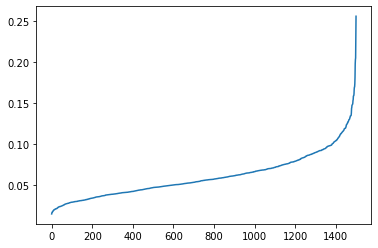

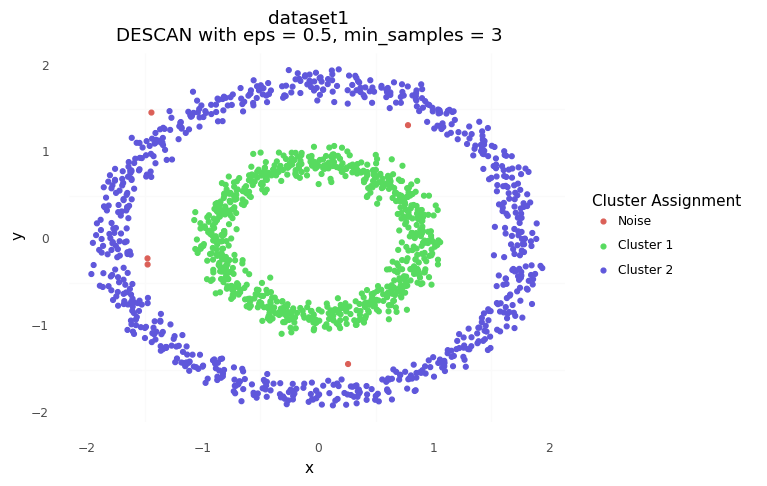

<ggplot: (8734310116893)>
0.11524193243452904
0.05818476703014367


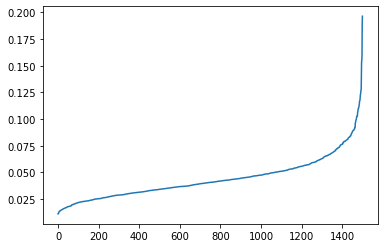

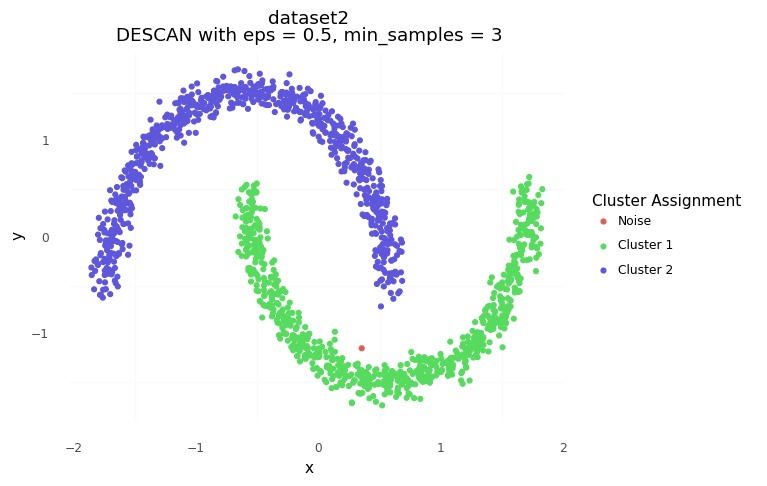

<ggplot: (8734298546205)>
0.39152006538356193
0.036950774844242466


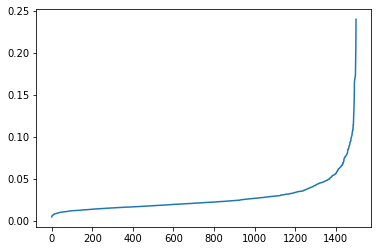

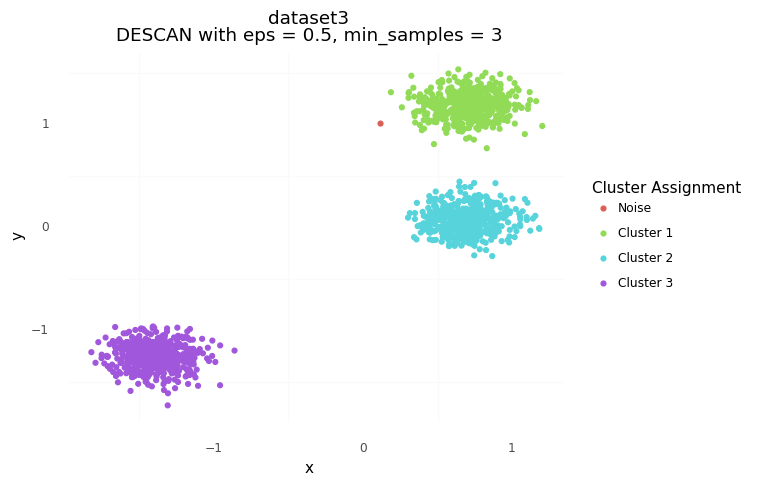

<ggplot: (8734308057265)>
0.8108953404642272
0.7312387192978403


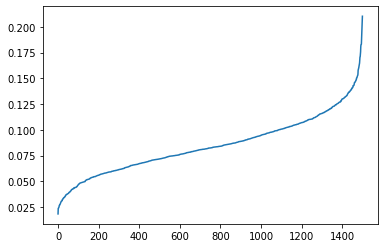

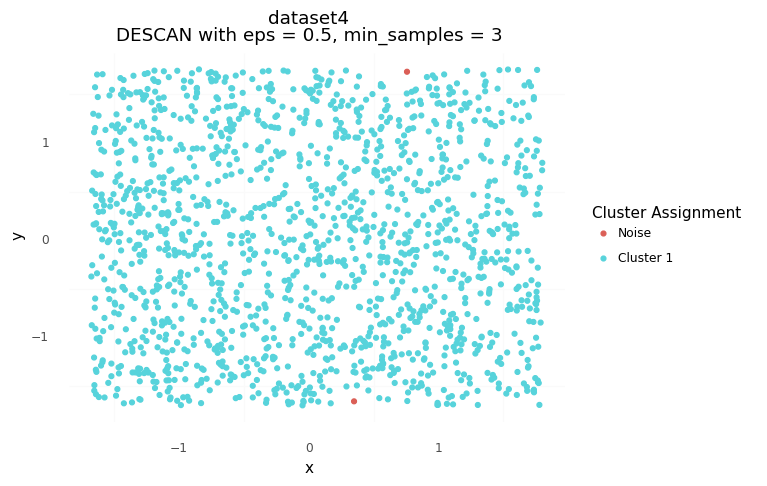

<ggplot: (8734298813053)>


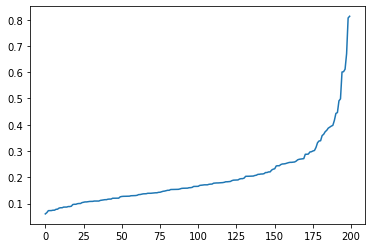

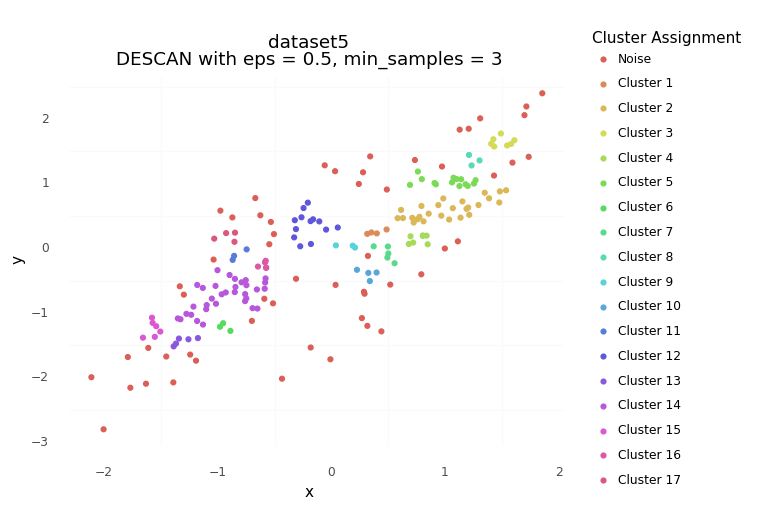

<ggplot: (8734298542833)>
0.31345305879869767
0.02070967080838995


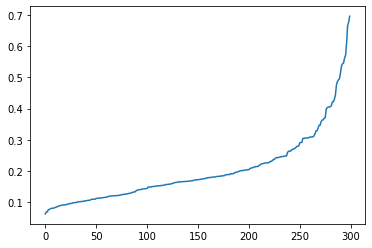

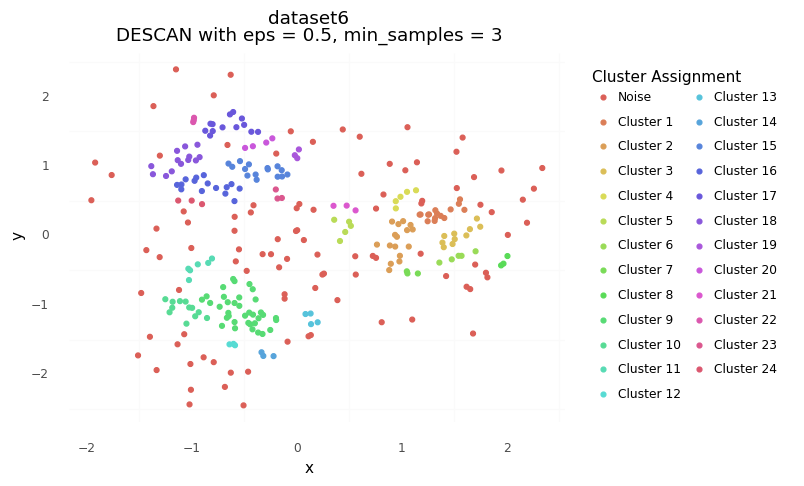

<ggplot: (8734298105829)>
0.355812230623376
-0.007357672859164645


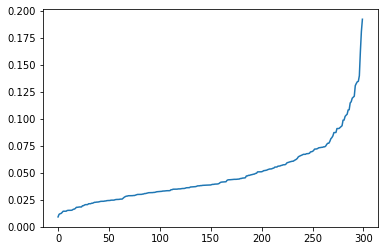

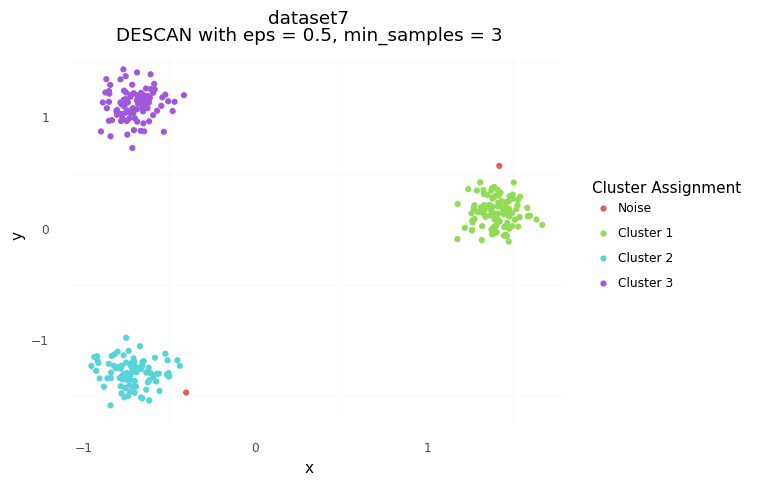

<ggplot: (8734298264745)>
0.9148033222018007
0.8718435723446343


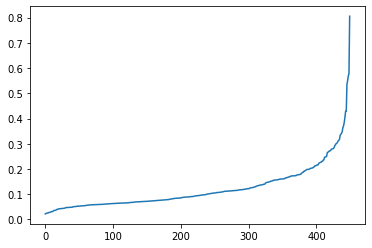

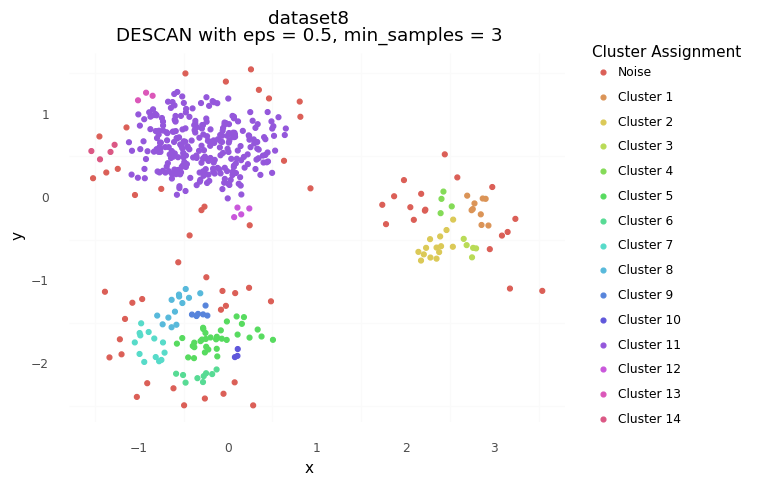

<ggplot: (8734298315305)>
0.1580591753958377
0.03256198237906896


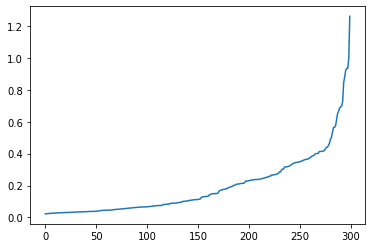

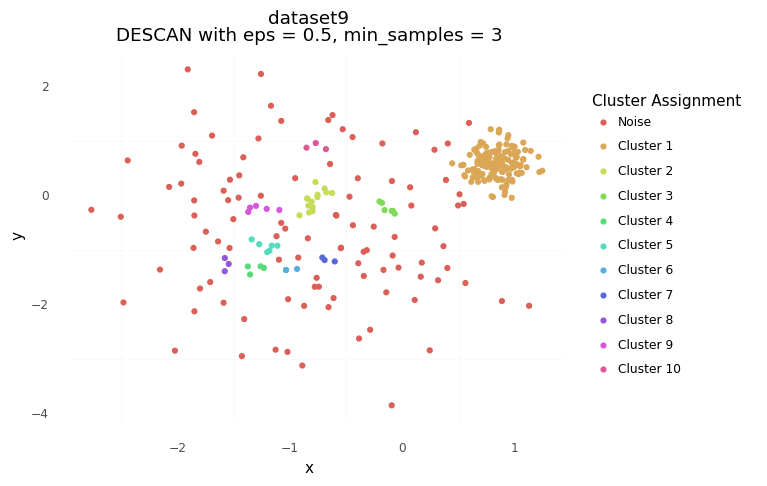

<ggplot: (8734298513269)>
0.7018710858848209
0.24222482954378638


In [20]:
datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]
i=1
for dataset in datasets:
    mins = 3
    nn = NearestNeighbors(n_neighbors=4)

    nn.fit(dataset[["x", "y"]])

    distances, neighbors = nn.kneighbors(dataset[["x", "y"]])

    distances = np.sort(distances[:, mins], axis = 0)
    X=list(range(0,len(distances)))
    plt.plot(X,distances)

    db = DBSCAN (eps = 0.15, min_samples = 3).fit(dataset)
    labsList = ["Noise"]
    labsList = labsList + ["Cluster " + str(i) for i in range(1, len(set(db.labels_)))]
    dataset["assignments" ] = db.labels_
    print(ggplot(dataset, aes(x = "x", y = "y", 
                          color = "factor(assignments)"))+ 
                    geom_point()+ 
                    theme_minimal()+ 
                    scale_color_discrete (name = "Cluster Assignment",
                                          labels = labsList) + 
    theme (panel_grid_major = element_blank()) + 
    labs(title = "dataset"+str(i)+"\nDESCAN with eps = 0.5, min_samples = 3"))
    i+=1
    try:
      #grab only clustered data points 
      dataset_clustered = dataset.loc[(dataset.assignments >= 0)]
      print (silhouette_score(dataset_clustered[["x", "y"]],dataset_clustered["assignments"]))
      # overall 
      print (silhouette_score(dataset[["x", "y"]], dataset["assignments"]))
    except:
      pass

# from the previous plots we see some weird insights, for example for dataset2 we see overall silhouette_score is low despite the data is well clustered so silhouette_score may  deceive you sometimes

In [23]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]
for dataset in datasets:
    hac = AgglomerativeClustering(2)
    km = KMeans (3)

    hac.fit(dataset[["x", "y"]])
    km.fit(dataset[["x","y"]])

    dataset["hac"] = hac.labels_
    dataset["km"] = km.labels_


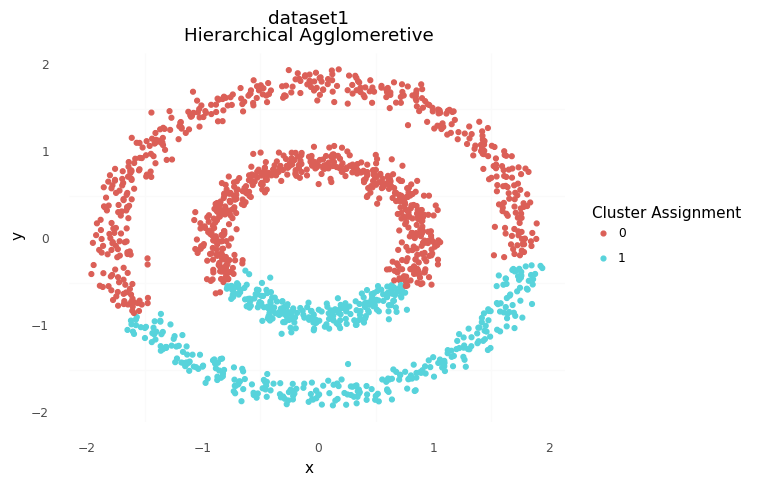

<ggplot: (8734298430513)>


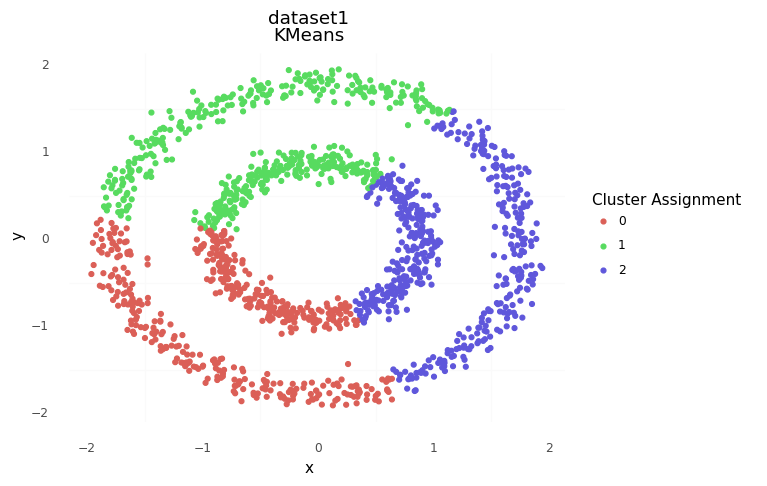

<ggplot: (8734298369057)>


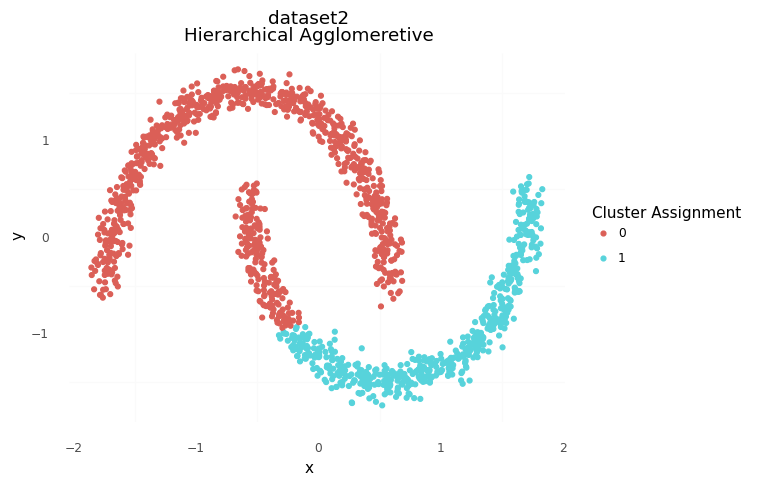

<ggplot: (8734307925281)>


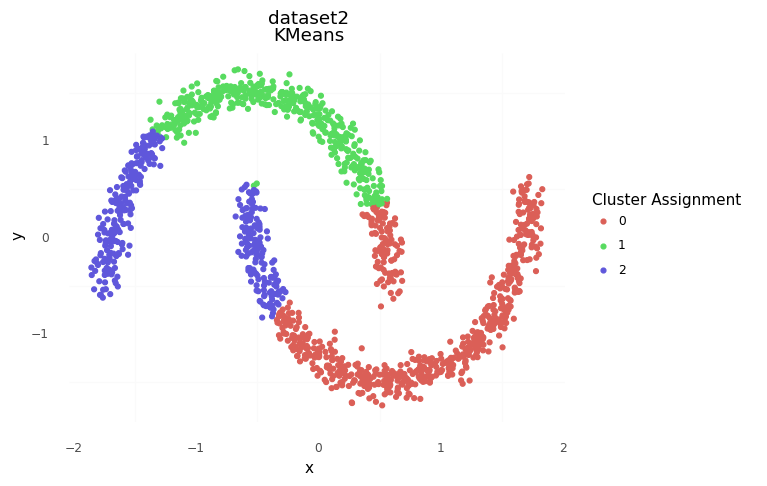

<ggplot: (8734298781809)>


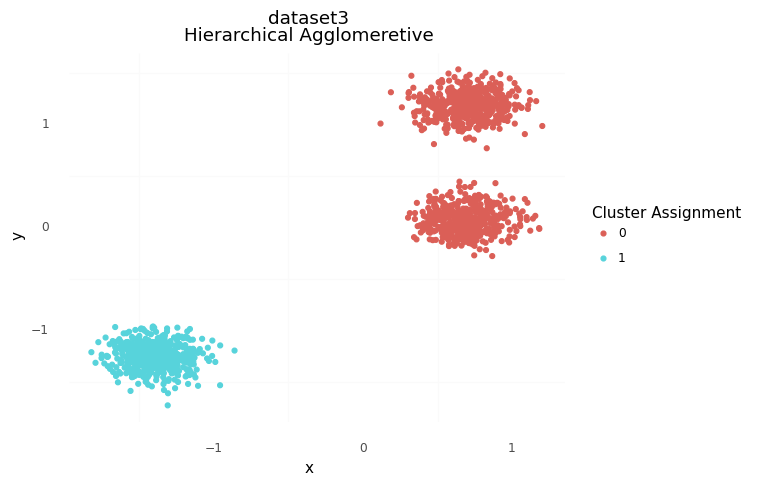

<ggplot: (8734298687637)>


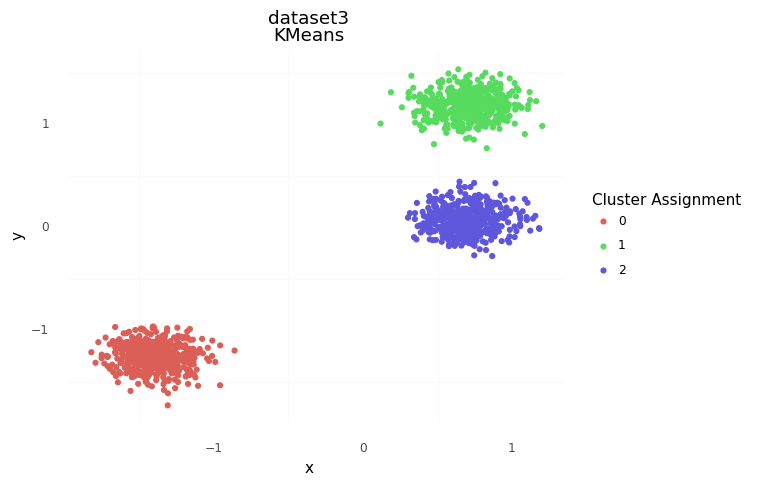

<ggplot: (8734308083945)>


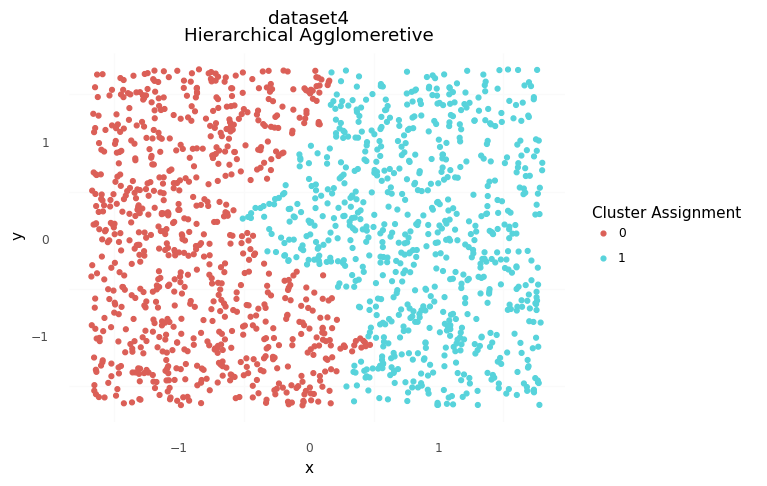

<ggplot: (8734310098005)>


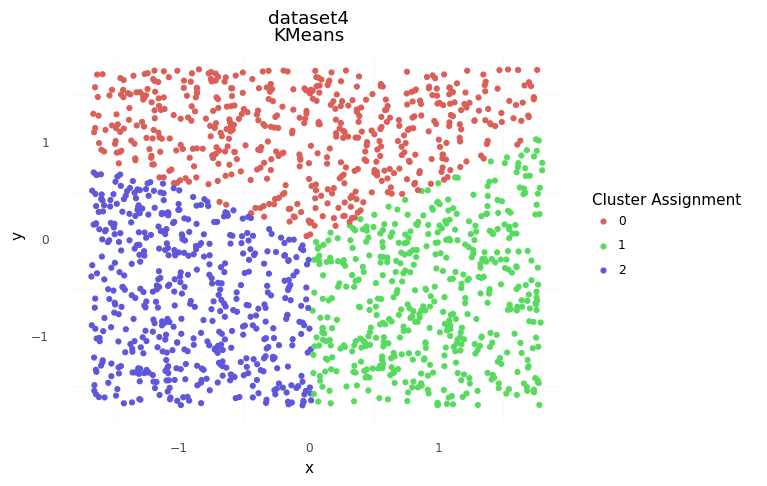

<ggplot: (8734298691449)>


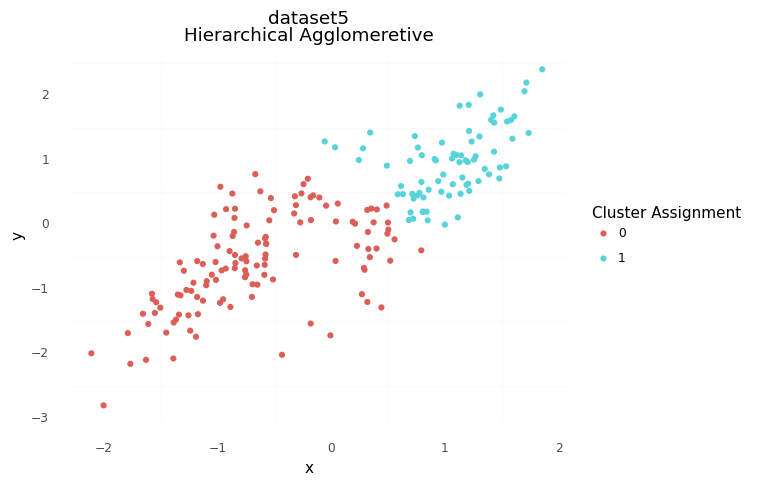

<ggplot: (8734330026641)>


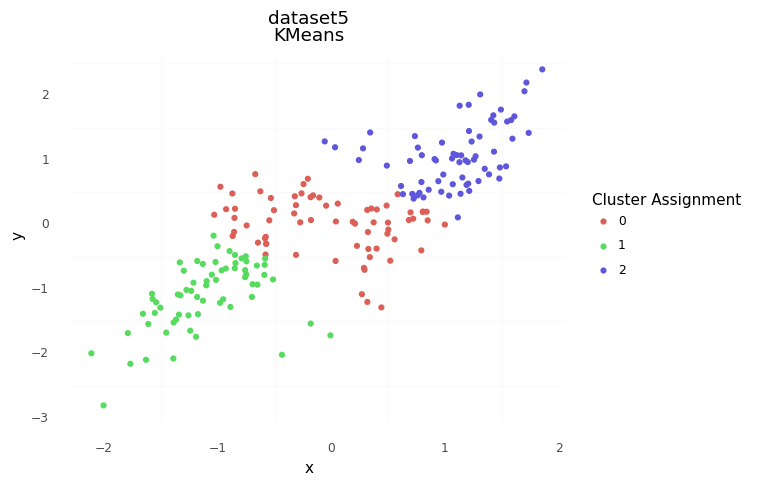

<ggplot: (8734311359209)>


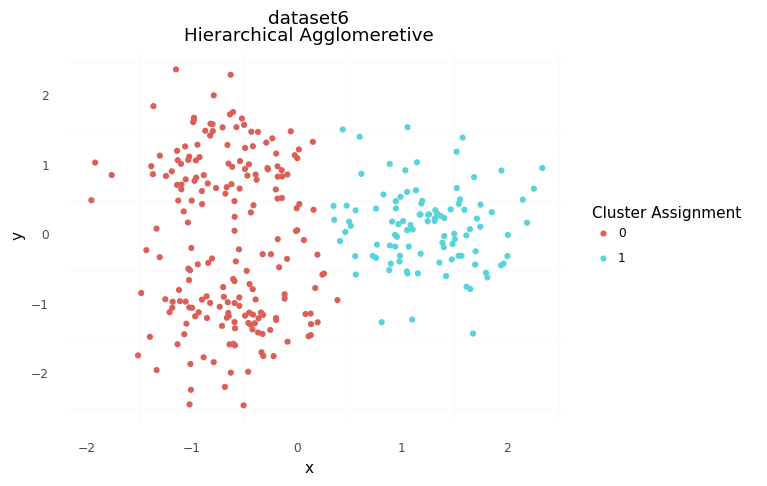

<ggplot: (8734311359209)>


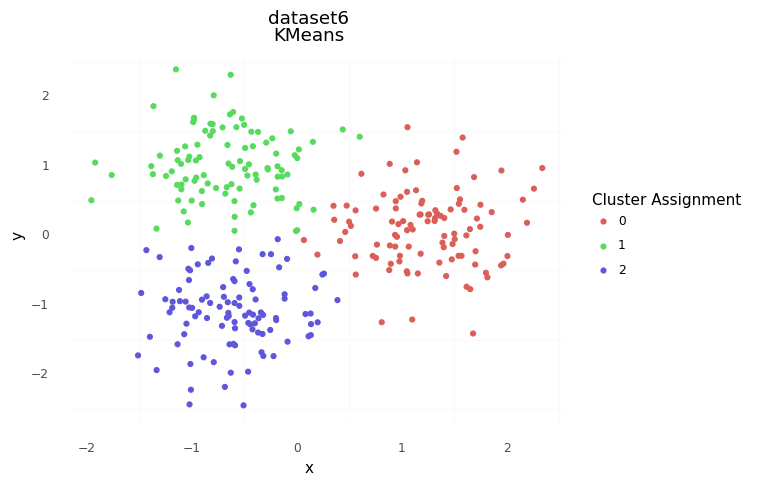

<ggplot: (8734298781933)>


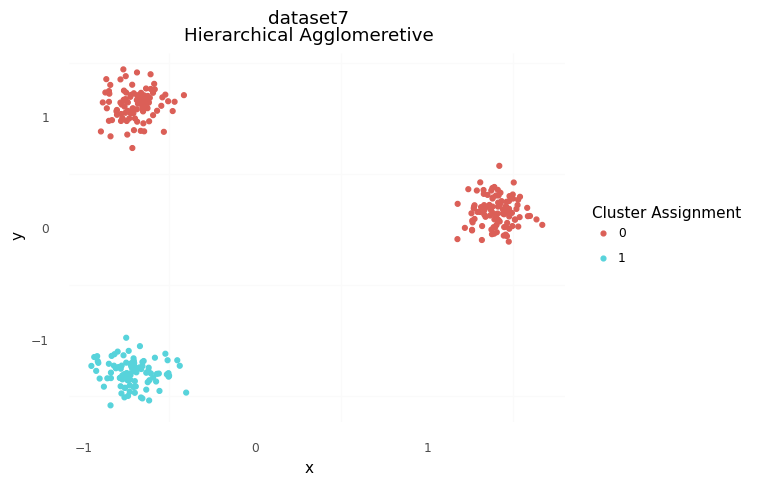

<ggplot: (8734298293701)>


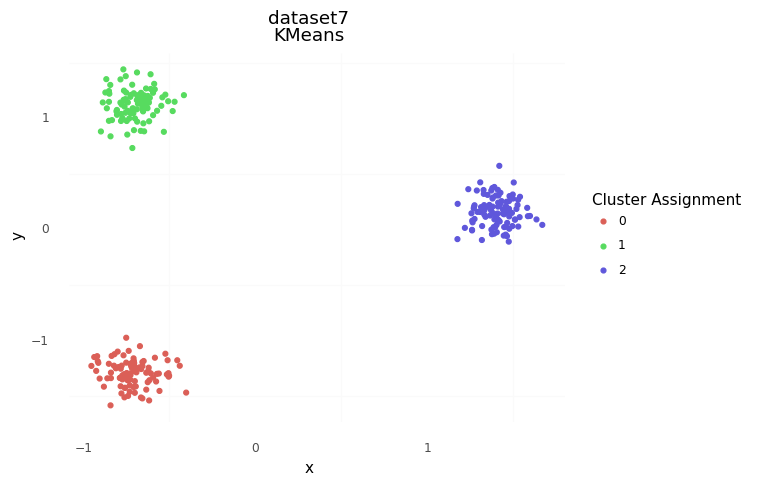

<ggplot: (8734298516645)>


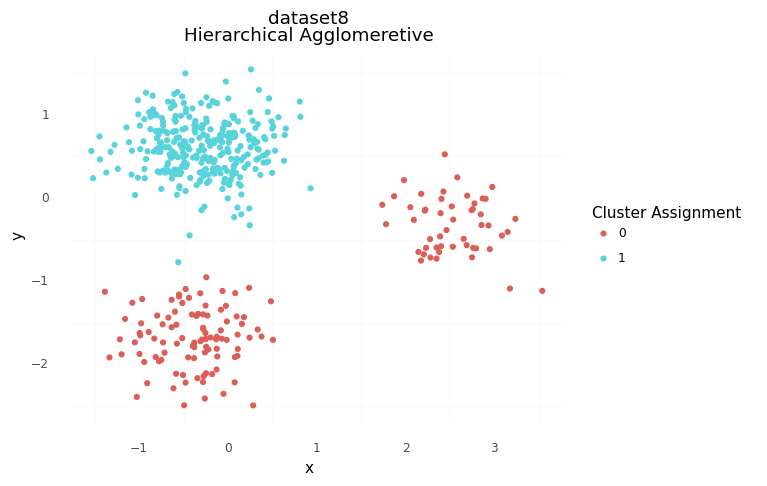

<ggplot: (8734298445701)>


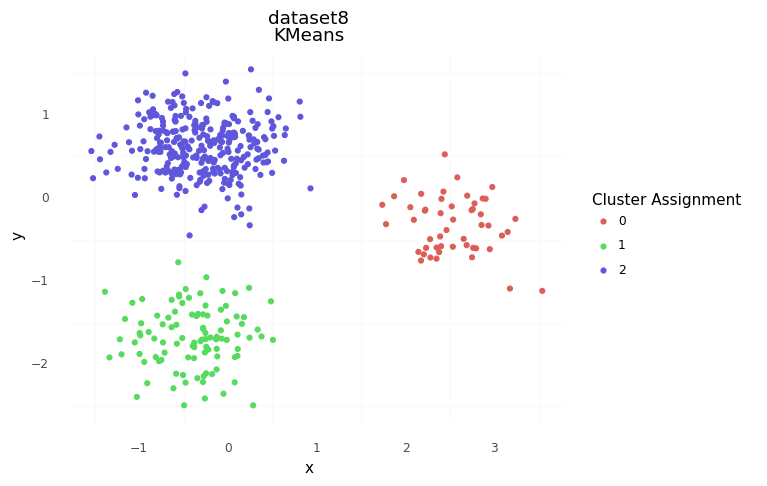

<ggplot: (8734308142233)>


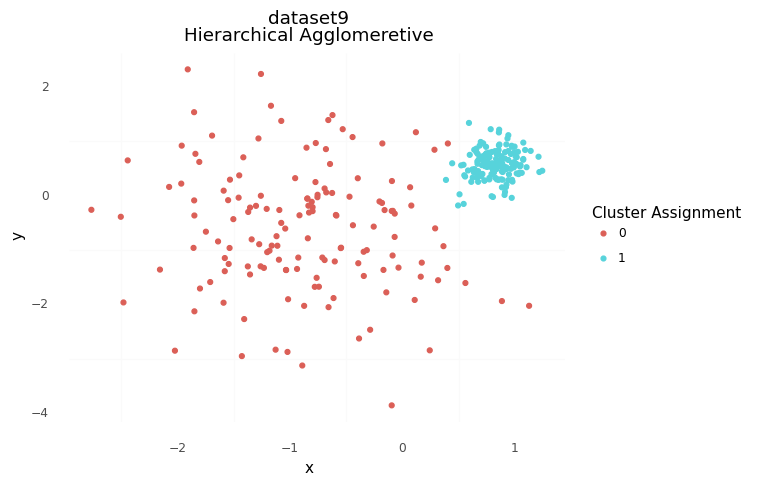

<ggplot: (8734298555141)>


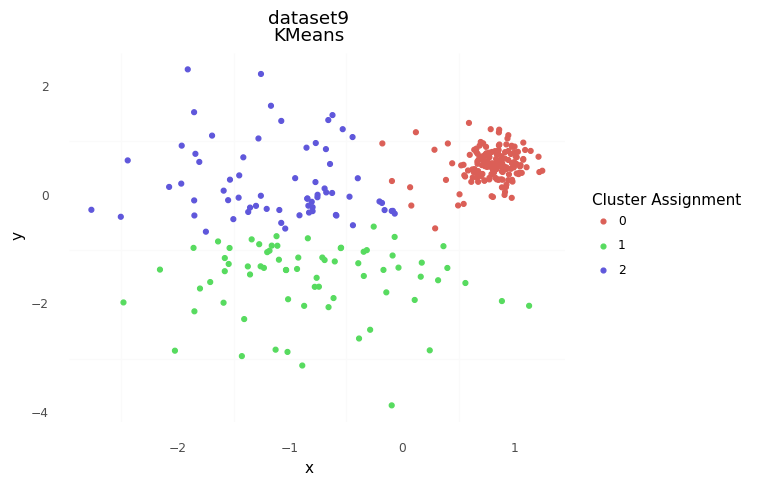

<ggplot: (8734298293701)>


In [24]:
datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6,dataset7,dataset8,dataset9]
i=1
for dataset in datasets:

  print (ggplot(dataset, aes (x = "x", y = "y",
                              color = "factor(hac)"))+
                          geom_point() +
                          theme_minimal() +
                          scale_color_discrete (name = "Cluster Assignment") +
                          theme (panel_grid_major = element_blank()) +
                          labs(title = "dataset"+str(i)+"\nHierarchical Agglomeretive"))
  print (ggplot(dataset, aes (x = "x", y = "y",
                              color = "factor(km)"))+
                          geom_point() +
                          theme_minimal() +
                          scale_color_discrete (name = "Cluster Assignment") +
                          theme (panel_grid_major = element_blank()) +
                          labs(title = "dataset"+str(i)+"\nKMeans"))
  i+=1












# we see kmeans clustered the three clusters well but dataset2 for example is wrong clustered but dbscan clustered it well